In [3]:
#Importing all the libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [4]:
import seaborn as sns
import math

In [5]:
weather_df=pd.read_csv(r'C:\Users\Mayank\Desktop\Mayank\AI Weather and Pollution Prediction Project\Main Datasets\Weather Station\Rainfall.csv')

In [6]:
weather_df.shape

(100990, 9)

In [7]:
weather_df.head()
weather_df.describe()

,Date,Month,Hour,dewpt,humidity,rain,thunder,rain previous
count,100990.000000,100990.000000,100990.000000,100369.000000,100233.000000,100990.000000,100990.000000,100990.000000
mean,15.690049,6.579344,10.928844,15.741205,57.909481,0.026260,0.009427,0.026260
std,8.769718,3.475841,6.854328,7.058587,23.807771,0.159908,0.096633,0.159908
min,1.000000,1.000000,0.000000,-24.000000,4.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,5.000000,10.000000,39.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,11.000000,15.000000,59.000000,0.000000,0.000000,0.000000
75%,23.000000,10.000000,17.000000,22.000000,78.000000,0.000000,0.000000,0.000000
max,31.000000,12.000000,23.000000,75.000000,243.000000,1.000000,1.000000,1.000000


In [8]:
weather_df.head()

,Date,Month,Hour,Time,dewpt,humidity,rain,thunder,rain previous
0,1,11,11,11:00,9.0,27.0,0,0,0
1,1,11,12,12:00,10.0,32.0,0,0,0
2,1,11,13,13:00,11.0,44.0,0,0,0
3,1,11,14,14:00,10.0,41.0,0,0,0
4,1,11,16,16:00,11.0,47.0,0,0,0


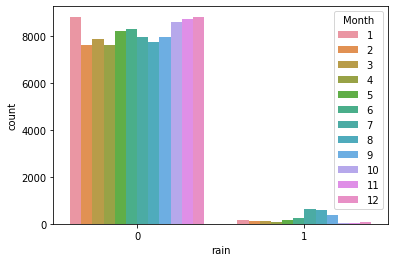

In [9]:
#Analyzing Data
sns.countplot(x="rain",hue="Month",data=weather_df)

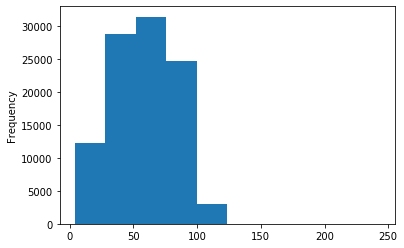

In [15]:
weather_df["humidity"].plot.hist()

Pre-Processing the data

In [10]:
#Preprocessing the data
print(weather_df.isnull().any())

Date             False
Month            False
Hour             False
Time             False
dewpt             True
humidity          True
rain             False
thunder          False
rain previous    False
dtype: bool


In [11]:
weather_df["humidity"].fillna(57.909481, inplace = True)
weather_df["dewpt"].fillna(15.741205, inplace = True)
print(weather_df.isnull().any())
#All these mean values are obtained after describing the data set

Date             False
Month            False
Hour             False
Time             False
dewpt            False
humidity         False
rain             False
thunder          False
rain previous    False
dtype: bool


In [12]:
weather_df.head()

,Date,Month,Hour,Time,dewpt,humidity,rain,thunder,rain previous
0,1,11,11,11:00,9.0,27.0,0,0,0
1,1,11,12,12:00,10.0,32.0,0,0,0
2,1,11,13,13:00,11.0,44.0,0,0,0
3,1,11,14,14:00,10.0,41.0,0,0,0
4,1,11,16,16:00,11.0,47.0,0,0,0


In [13]:
weather_df.drop(["Time"],axis=1,inplace=True)

In [14]:
weather_df.head()

,Date,Month,Hour,dewpt,humidity,rain,thunder,rain previous
0,1,11,11,9.0,27.0,0,0,0
1,1,11,12,10.0,32.0,0,0,0
2,1,11,13,11.0,44.0,0,0,0
3,1,11,14,10.0,41.0,0,0,0
4,1,11,16,11.0,47.0,0,0,0


In [15]:
#Training and Testing the data
x=weather_df.drop(["rain"],axis=1)
y=weather_df["rain"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
prediction=logmodel.predict(x_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     19709\n           1       0.76      0.22      0.34       489\n\n    accuracy                           0.98     20198\n   macro avg       0.87      0.61      0.67     20198\nweighted avg       0.98      0.98      0.97     20198\n'

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,prediction)
##  PN PY
##AN
##AY


array([[19675,    34],
       [  381,   108]], dtype=int64)

In [23]:
x_test.shape

(20198, 7)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9794534112288346

In [25]:
l=np.array([28,6,19,25,50,0,0]).reshape(1,-1)
print(logmodel.predict(l))

[0]


In [26]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr.predict(l)

array([0], dtype=int64)

In [29]:
#Saving the Logistic Regression Model
from sklearn.externals import joblib
joblib.dump(logmodel, 'PLogisticRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('HUMDT.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['PLogisticRegression.pkl']

In [28]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [30]:
prediction4=regr.predict(x_test)
np.mean((prediction4-y_test)**2)

0.015507244149227908

In [31]:
l=np.array([28,6,19,25,50,0,0]).reshape(1,-1)
regr.predict(l)

array([0.])

In [32]:
#Saving the Random Forest Model
joblib.dump(regr, 'PRandomForest.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('PRandomForest.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['PRandomForest.pkl']